# Avocado

In [1]:
# Import some useful libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import dataset
df = pd.read_csv("avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
#checking shape of rows and columns of dataset
df.shape

(1517, 14)

In [4]:
#Check null values in dataset
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<AxesSubplot:>

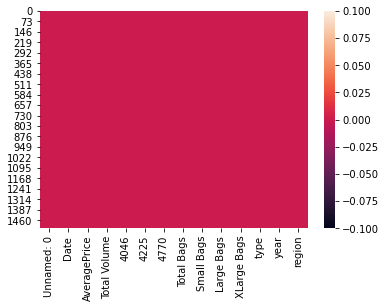

In [5]:
#check null values using heatmap
sns.heatmap(df.isnull())

No null value found in dataset

In [6]:
#check datatype and null values of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   int64  
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   int64  
 13  region        1517 non-null   object 
dtypes: float64(9), int64(2), object(3)
memory usage: 166.0+ KB


In [7]:
df["type"].value_counts()

conventional    1517
Name: type, dtype: int64

In our datset only conventional type of avocado is present. 

In [8]:
df["region"].value_counts()

California             76
Albany                 67
BaltimoreWashington    65
Boise                  65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Tampa                  34
Louisville             34
Charlotte              31
Portland               30
NorthernNewEngland     29
Houston                29
WestTexNewMexico       27
Nashville              25
TotalUS                25
Denver                 24
SouthCarolina          24
GrandRapids            23
Chicago                23
Pittsburgh             22
Orlando                21
RichmondNorfolk        21
HarrisburgScranton     19
Syracuse               19
GreatLakes             18
Midsouth               18
MiamiFtLauderdale      17
Roanoke                17
DallasFtWort

In [9]:
#drop unnamed column because it is only index and also drop type column because it have only one value,and don't impact on our dataset.
df.drop(["Unnamed: 0","type"],axis=1,inplace=True)

In [10]:
#convert datatype of date column from object to datetime
df["Date"] = pd.to_datetime(df["Date"])

In [11]:
#split date columns in day and month wise.year column already we have in our daaset. Also delete the extra date column.
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
df.drop(["Date"],axis=1,inplace=True)

In [12]:
df.sample(5)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month,Day
1255,0.76,840314.58,564694.43,167105.74,11290.94,97223.47,71587.33,25636.14,0.00,2015,WestTexNewMexico,12,4
136,1.07,67826.07,50978.38,4856.27,5479.57,6511.85,6358.04,153.81,0.00,2015,Boise,7,26
53,1.08,331377.53,251774.15,20702.45,103.06,58797.87,46930.26,11867.61,0.00,2015,Atlanta,12,20
283,1.00,172913.44,80303.92,40370.03,26369.27,25870.22,20819.20,1861.68,3189.34,2015,Columbus,4,19
449,0.90,948126.90,568694.81,281941.22,3494.60,93996.27,60782.86,33213.41,0.00,2015,Houston,2,8


## Univariate Analysis

<AxesSubplot:xlabel='AveragePrice'>

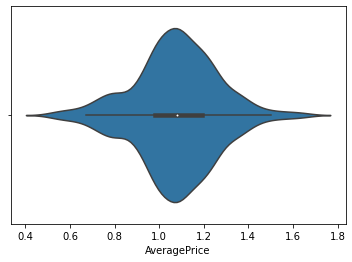

In [13]:
#violinplot of average price
sns.violinplot(x="AveragePrice",data=df)

Mostly average price of avocado is between 0.9 to 1.3 in the span of two years.

## Bivariate Analysis

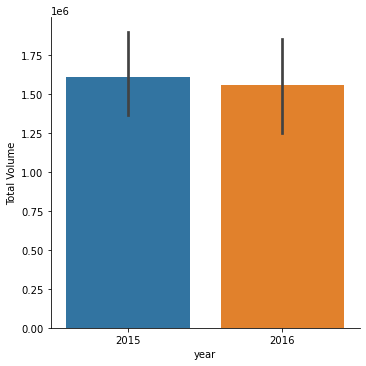

In [14]:
#check yearwise total volume of avocados.
sns.factorplot(x="year",y="Total Volume",data=df,kind="bar")

More number of avocados sold in year 2015 compared to 2016. 

<AxesSubplot:xlabel='region', ylabel='AveragePrice'>

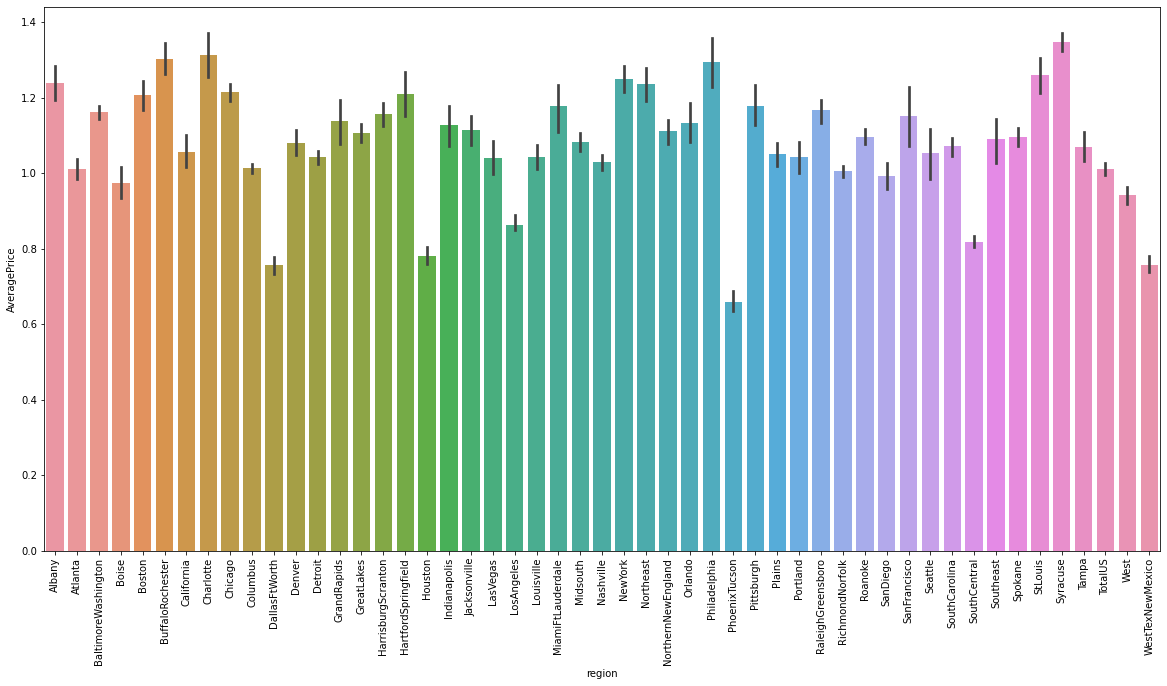

In [15]:
#check region wise average price of avocado.
plt.figure(figsize=(20,10))
plt.xticks(rotation="vertical")
sns.barplot(x = df["region"],y = df["AveragePrice"],data=df)

Syracuse region had high price of avocado, while PhoenixTucson region had low price of avocado throughout 2015 and 2016.

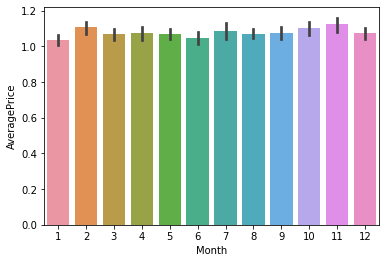

,Month,AveragePrice
0,1,1.034894
1,2,1.105400
2,3,1.066962
3,4,1.071532
4,5,1.070938
5,6,1.047388
6,7,1.085632
7,8,1.070955
8,9,1.074176
9,10,1.100408


In [16]:
#check month wise avocados price 
sns.barplot(x="Month",y="AveragePrice",data=df)
plt.show()

df.groupby("Month")["AveragePrice"].mean().reset_index()

There is no much difference between price of avocados month wise.

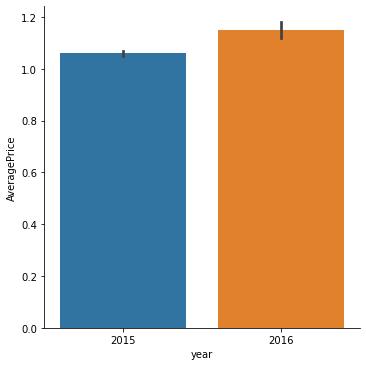

,year,AveragePrice
0,2015,1.060110
1,2016,1.151498


In [17]:
#check mean average price of avocado for each year.
sns.factorplot(x="year",y="AveragePrice",kind="bar",data=df)
plt.show()

df.groupby("year")["AveragePrice"].mean().reset_index()

In year 2016 avocado price is higher than 2015.

<AxesSubplot:>

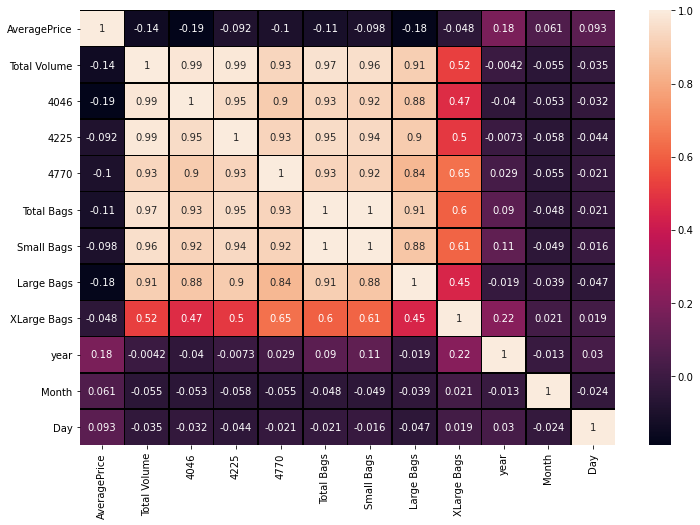

In [18]:
#check correlations of every attributes through heatmap.
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,linewidth=0.6,linecolor="black")

In [19]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821,6.362558,15.253790
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324,3.472146,8.965902
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000,3.000000,7.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000,6.000000,15.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000,9.000000,22.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000,12.000000,31.000000


1. In dataset there is more difference between mean and standerd deviation. it shows that skewness present in data and need to remove skewness.


2. minimum avg. price of avocado is 0.49 and maximum avg. price of avocado is 1.68 throughout both years.

## Check Skewness

In [20]:
#checking skewness
df.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
Month           0.101439
Day             0.041303
dtype: float64

Skewness is present in data and need to remove.

<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

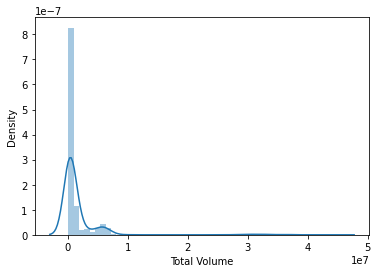

In [21]:
sns.distplot(df["Total Volume"])

<AxesSubplot:xlabel='4046', ylabel='Density'>

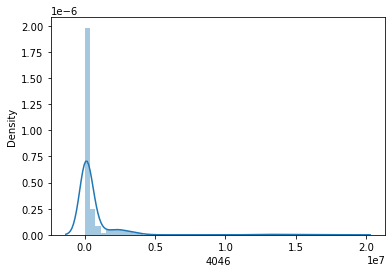

In [22]:
sns.distplot(df["4046"])

<AxesSubplot:xlabel='4225', ylabel='Density'>

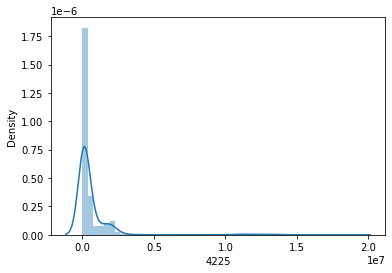

In [23]:
sns.distplot(df["4225"])

<AxesSubplot:xlabel='Total Bags', ylabel='Density'>

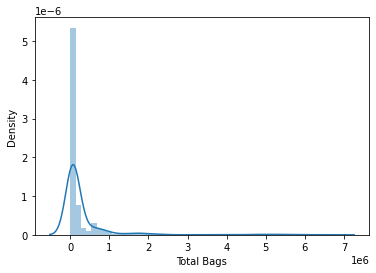

In [24]:
sns.distplot(df["Total Bags"])

## Handling Outliers

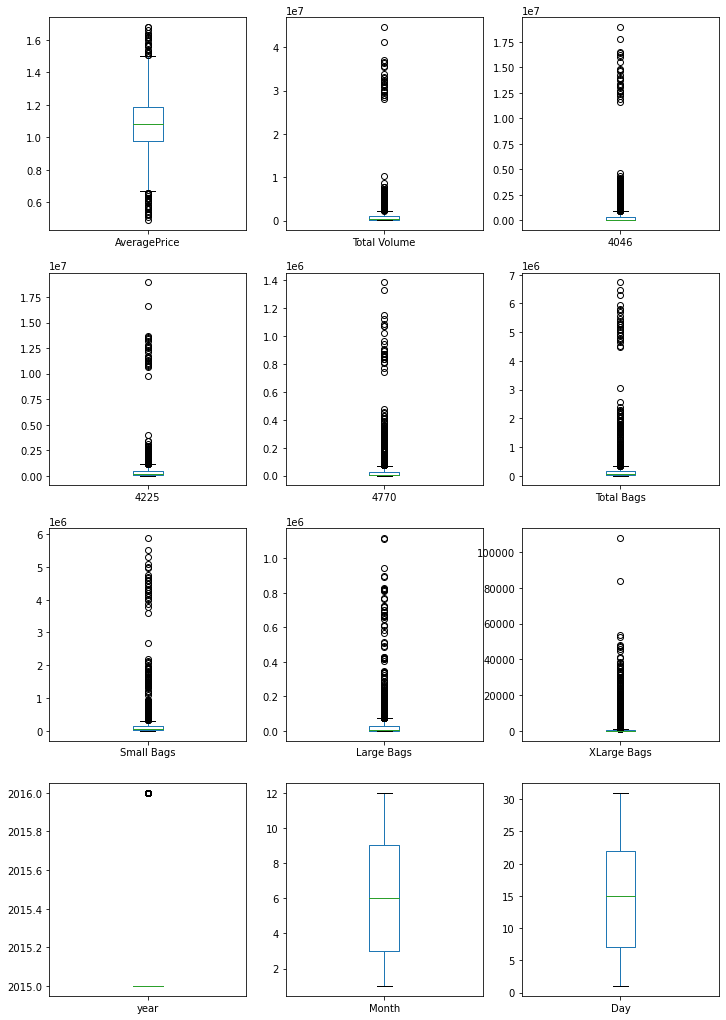

In [25]:
#checking outliers
df.plot(kind="box",figsize=(12,18),layout=(4,3),subplots=True)
plt.show()

Above box plot shows that outliers present in alomst all attributes except month and day attributes.we need to remove outliers.

In [26]:
#convert categorical data into numerical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["region"] = le.fit_transform(df["region"])
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,0,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,0,11,29


In [27]:
#check outliers through zscore
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold=3
print(np.where(z>3))

(array([ 398,  401,  409,  412,  412,  760, 1016, 1017, 1059, 1182, 1182,
       1182, 1182, 1182, 1182, 1182, 1182, 1183, 1183, 1183, 1183, 1183,
       1183, 1183, 1184, 1184, 1184, 1184, 1184, 1184, 1184, 1184, 1185,
       1185, 1185, 1185, 1185, 1185, 1185, 1186, 1186, 1186, 1186, 1186,
       1186, 1186, 1187, 1187, 1187, 1187, 1187, 1187, 1187, 1187, 1188,
       1188, 1188, 1188, 1188, 1188, 1188, 1189, 1189, 1189, 1189, 1189,
       1189, 1189, 1189, 1190, 1190, 1190, 1190, 1190, 1190, 1190, 1190,
       1191, 1191, 1191, 1191, 1191, 1191, 1191, 1191, 1192, 1192, 1192,
       1192, 1192, 1192, 1192, 1193, 1193, 1193, 1193, 1193, 1193, 1193,
       1194, 1194, 1194, 1194, 1194, 1194, 1194, 1195, 1195, 1195, 1195,
       1195, 1195, 1195, 1195, 1196, 1196, 1196, 1196, 1196, 1196, 1196,
       1197, 1197, 1197, 1197, 1197, 1197, 1197, 1198, 1198, 1198, 1198,
       1198, 1198, 1198, 1198, 1199, 1199, 1199, 1199, 1199, 1199, 1199,
       1200, 1200, 1200, 1200, 1200, 1200, 1200, 1

In [28]:
df_new = df[(z<3).all(axis=1)]
df_new

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015,0,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016,7,10,16
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016,7,9,10
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016,7,2,10
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016,7,9,25


In [29]:
print(df.shape)
print(df_new.shape)

(1517, 13)
(1436, 13)


In [30]:
percentage_loss = ((1517-1436)/1517)*100
percentage_loss

5.339485827290705

Here,loss of data is 5.33% by using zscore and it is acceptable in terms of removing outliers.

## Prepare data for model training

In [31]:
#our target varieble is average price and take it as a Y-varieable.
x = df_new.drop(["AveragePrice"],axis=1)
y = df_new["AveragePrice"]

## Removing Skewness

In [32]:
#remove skewness
x = np.log1p(x)

## Scaling data

In [33]:
#In data difference between values is high so, we use scaling method to convert values with 0(zero) mean and unit varience
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_s = sc.fit_transform(x)

In [34]:
#divide dataset into train data and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_s,y,test_size=0.3,random_state=5)

In [35]:
#Check shape of train and test data
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1005, 12)
(1005,)
(431, 12)
(431,)


## Finding the best model

In [36]:
# our target variable is Average Price so it's a regression type problem.
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_squared_error

model = [LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor()]

for i in model:
    i.fit(x_train,y_train)
    train = i.score(x_train,y_train)
    predi = i.predict(x_test)
    print("Accuracy score of",i,"is:")
    print("Training accuracy score:",train)
    print("r2 score:",r2_score(y_test,predi))
    print("mean squared error:",mean_squared_error(y_test,predi))
    print("root mean squared error:",np.sqrt(mean_squared_error(y_test,predi)))
    print('\n')

Accuracy score of LinearRegression() is:
Training accuracy score: 0.3764469762654469
r2 score: 0.44707112627177104
mean squared error: 0.021063676929185718
root mean squared error: 0.14513330744245345


Accuracy score of SVR() is:
Training accuracy score: 0.8148637345978997
r2 score: 0.7382237214847265
mean squared error: 0.009972297017501101
root mean squared error: 0.09986138902249007


Accuracy score of DecisionTreeRegressor() is:
Training accuracy score: 1.0
r2 score: 0.7451158093996376
mean squared error: 0.009709744779582367
root mean squared error: 0.0985380372220919


Accuracy score of KNeighborsRegressor() is:
Training accuracy score: 0.8183323974443804
r2 score: 0.6638281620923203
mean squared error: 0.012806375870069605
root mean squared error: 0.11316525911281079




Support vector regressor and Decision tree regressor give good r2 score. 

In [37]:
from sklearn.model_selection import GridSearchCV
sv = SVR()

In [38]:
parameters={'kernel':['rbf','linear','poly','sigmoid']}
rg = GridSearchCV(sv,parameters)
rg.fit(x_train,y_train)
print(rg.best_params_)

{'kernel': 'rbf'}


In [39]:
sv = SVR(kernel='rbf')
sv.fit(x_train,y_train)
train = sv.score(x_train,y_train)
predsv = sv.predict(x_test)
print("Training accuracy score:",train)
print("r2 score:",r2_score(y_test,predsv))
print("mean squared error:",mean_squared_error(y_test,predsv))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,predsv)))

Training accuracy score: 0.8148637345978997
r2 score: 0.7382237214847265
mean squared error: 0.009972297017501101
root mean squared error: 0.09986138902249007


In [40]:
from sklearn.linear_model import Lasso
ls = Lasso()
parameters = {'alpha':[0.0001,0.001,0.01,0.1,1],'random_state':list(range(0,10))}
rg = GridSearchCV(ls,parameters)
rg.fit(x_train,y_train)
print(rg.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [41]:
ls = Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train,y_train)
train = ls.score(x_train,y_train)
predls = ls.predict(x_test)
print("Training accuracy score:",train)
print("r2 score:",r2_score(y_test,predls))
print("mean squared error:",mean_squared_error(y_test,predls))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,predls)))

Training accuracy score: 0.3763667103831535
r2 score: 0.4475063133523931
mean squared error: 0.02104709859423972
root mean squared error: 0.14507618203633468


In [42]:
from sklearn.linear_model import Ridge
rd = Ridge()
parameters = {'alpha':[0.0001,0.001,0.01,0.1,1],'random_state':list(range(0,10))}
rg = GridSearchCV(rd,parameters)
rg.fit(x_train,y_train)
print(rg.best_params_)

{'alpha': 1, 'random_state': 0}


In [43]:
rd = Ridge(alpha=1,random_state=0)
rd.fit(x_train,y_train)
train = rd.score(x_train,y_train)
predrd = rd.predict(x_test)
print("Training accuracy score:",train)
print("r2 score:",r2_score(y_test,predrd))
print("mean squared error:",mean_squared_error(y_test,predrd))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,predrd)))

Training accuracy score: 0.3762691460964199
r2 score: 0.44773438267623633
mean squared error: 0.021038410354606837
root mean squared error: 0.1450462352307251


We don't get good accuracy using regularization techniques(Lasso and Ridge).

In [44]:
#check accuracy using bagging method
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
parameters = {'n_estimators':[50,100,150,200],'criterion':['mse','mae']}
rg = GridSearchCV(rf,parameters)
rg.fit(x_train,y_train)
print(rg.best_params_)

{'criterion': 'mse', 'n_estimators': 200}


In [45]:
rf = RandomForestRegressor(criterion='mse', n_estimators=200)
rf.fit(x_train,y_train)
train = rf.score(x_train,y_train)
predrf = rf.predict(x_test)
print("Training accuracy score:",train)
print("r2 score:",r2_score(y_test,predrf))
print("mean squared error:",mean_squared_error(y_test,predrf))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,predrf)))

Training accuracy score: 0.973899150439283
r2 score: 0.8234468361826074
mean squared error: 0.006725745353828316
root mean squared error: 0.08201064171086772


In [46]:
#check accuracy by using boosting techniques.
from sklearn.ensemble import AdaBoostRegressor
ad = AdaBoostRegressor()
parameters = {'n_estimators':[50,100,150],'learning_rate':[0.001,0.01,0.1,1],'loss':['linear','square', 'exponential']}
rg = GridSearchCV(ad,parameters)
rg.fit(x_train,y_train)
print(rg.best_params_)

{'learning_rate': 1, 'loss': 'square', 'n_estimators': 150}


In [47]:
ad = AdaBoostRegressor(learning_rate=1, loss='square', n_estimators=150)
ad.fit(x_train,y_train)
train=ad.score(x_train,y_train)
predad = ad.predict(x_test)
print("Training accuracy score:",train)
print("r2 score:",r2_score(y_test,predad))
print("mean squared error:",mean_squared_error(y_test,predad))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,predad)))

Training accuracy score: 0.6724297632994994
r2 score: 0.6450962998157692
mean squared error: 0.01351996113215741
root mean squared error: 0.11627536769306478


In [48]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)
train=gb.score(x_train,y_train)
predgb = gb.predict(x_test)
print("Training accuracy score:",train)
print("r2 score:",r2_score(y_test,predgb))
print("mean squared error:",mean_squared_error(y_test,predgb))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,predgb)))

Training accuracy score: 0.8589006810583286
r2 score: 0.7487272381977769
mean squared error: 0.009572168369539159
root mean squared error: 0.097837458928261


In [49]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
parameters = {'n_estimators':[50,100,150],'learning_rate':[0.001,0.01,0.1,1],'booster':['gbtree','gblinear','dart']}
rg = GridSearchCV(xgb,parameters)
rg.fit(x_train,y_train)
print(rg.best_params_)

{'booster': 'gbtree', 'learning_rate': 0.1, 'n_estimators': 150}


In [50]:
xgb = XGBRegressor(booster='gbtree',learning_rate=0.1,n_estimators=150)
xgb.fit(x_train,y_train)
train=xgb.score(x_train,y_train)
predxg = xgb.predict(x_test)
print("Training accuracy score:",train)
print("r2 score:",r2_score(y_test,predxg))
print("mean squared error:",mean_squared_error(y_test,predxg))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,predxg)))

Training accuracy score: 0.9944126961021214
r2 score: 0.8242480601239316
mean squared error: 0.006695222942990577
root mean squared error: 0.08182434199546353


From above observation, Randomforest regressor give best r2 score and mean squered error.

## Finding best model for classification problem

In [51]:
#Now,we take Region as our target variable and it is classification problem.
x_cl = df_new.drop(["region"],axis=1)
y_cl = df_new["region"]

In [52]:
#remove skewness
x_cl = np.log1p(x_cl)

In [53]:
#scaling data
sc = StandardScaler()
x_cl = sc.fit_transform(x_cl)

In [54]:
#split data into train and test data
x_train,x_test,y_train,y_test = train_test_split(x_cl,y_cl,test_size=0.3,random_state=42)

In [55]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1005, 12)
(1005,)
(431, 12)
(431,)


In [56]:
#find best model and import necessary libreries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

model = [LogisticRegression(),SVC(),KNeighborsClassifier(),GaussianNB(),DecisionTreeClassifier()]

for m in model:
    m.fit(x_train,y_train)
    train = m.score(x_train,y_train)
    predm = m.predict(x_test)
    print("Accuracy of",m,"is:")
    print("Traing accuracy score is:",train)
    print("Accuracy score is:",accuracy_score(y_test,predm))
    print("Confusion matrix:",confusion_matrix(y_test,predm))
    print('\n')

Accuracy of LogisticRegression() is:
Traing accuracy score is: 0.9482587064676616
Accuracy score is: 0.91415313225058
Confusion matrix: [[16  0  0 ...  0  0  0]
 [ 0 14  0 ...  0  0  0]
 [ 0  0 21 ...  0  0  0]
 ...
 [ 0  0  0 ... 11  0  0]
 [ 0  0  0 ...  0 10  0]
 [ 0  0  0 ...  0  0  5]]


Accuracy of SVC() is:
Traing accuracy score is: 0.9353233830845771
Accuracy score is: 0.9025522041763341
Confusion matrix: [[16  0  0 ...  0  0  0]
 [ 0 15  0 ...  0  0  0]
 [ 0  0 21 ...  0  0  0]
 ...
 [ 0  0  0 ... 10  0  0]
 [ 0  0  0 ...  0 11  0]
 [ 0  0  0 ...  0  0  5]]


Accuracy of KNeighborsClassifier() is:
Traing accuracy score is: 0.9223880597014925
Accuracy score is: 0.8584686774941995
Confusion matrix: [[16  0  0 ...  0  0  0]
 [ 0 14  0 ...  1  0  0]
 [ 0  0 21 ...  0  0  0]
 ...
 [ 0  2  0 ...  6  0  0]
 [ 0  0  0 ...  0 10  0]
 [ 0  0  0 ...  0  0  4]]


Accuracy of GaussianNB() is:
Traing accuracy score is: 0.9194029850746268
Accuracy score is: 0.8979118329466357
Confusion matri

In [57]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
parameters = {'n_estimators':[50,100,150],'criterion':['gini','entropy']}
clf = GridSearchCV(rfc,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'entropy', 'n_estimators': 50}


In [58]:
rfc = RandomForestClassifier(n_estimators=50,criterion='entropy')
rfc.fit(x_train,y_train)
train = rfc.score(x_train,y_train)
predrfc = rfc.predict(x_test)
print("Traing accuracy score is:",train)
print("Accuracy score is:",accuracy_score(y_test,predrfc))
print("Confusion matrix:",confusion_matrix(y_test,predrfc))

Traing accuracy score is: 1.0
Accuracy score is: 0.9605568445475638
Confusion matrix: [[15  0  0 ...  0  0  0]
 [ 0 15  0 ...  0  0  0]
 [ 0  0 21 ...  0  0  0]
 ...
 [ 0  2  0 ...  8  0  0]
 [ 0  0  0 ...  0  9  0]
 [ 0  0  0 ...  0  0  4]]


In [59]:
from sklearn.ensemble import AdaBoostClassifier
adc = AdaBoostClassifier(base_estimator=rfc,algorithm="SAMME")
adc.fit(x_train,y_train)
train = adc.score(x_train,y_train)
predadc = adc.predict(x_test)
print("Traing accuracy score is:",train)
print("Accuracy score is:",accuracy_score(y_test,predadc))
print("Confusion matrix:",confusion_matrix(y_test,predadc))

Traing accuracy score is: 1.0
Accuracy score is: 0.9582366589327146
Confusion matrix: [[14  0  0 ...  0  0  0]
 [ 0 15  0 ...  0  0  0]
 [ 0  0 21 ...  0  0  0]
 ...
 [ 0  1  0 ...  9  0  0]
 [ 0  0  0 ...  0 10  0]
 [ 0  0  0 ...  0  0  4]]


In [60]:
from sklearn.ensemble import GradientBoostingClassifier
gbr = GradientBoostingClassifier()
gbr.fit(x_train,y_train)
train = gbr.fit(x_train,y_train)
predgbr = gbr.predict(x_test)
print("Traing accuracy score is:",train)
print("Accuracy score is:",accuracy_score(y_test,predgbr))
print("Confusion matrix:",confusion_matrix(y_test,predgbr))

Traing accuracy score is: GradientBoostingClassifier()
Accuracy score is: 0.8816705336426914
Confusion matrix: [[13  0  0 ...  0  0  0]
 [ 0 15  0 ...  0  0  0]
 [ 0  0 21 ...  0  0  0]
 ...
 [ 0  2  0 ...  8  0  0]
 [ 0  0  0 ...  0 10  0]
 [ 0  0  0 ...  0  0  3]]


In [61]:
#check accuracy by cross-validation
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(rfc,x_cl,y_cl,cv=10)
print(accuracy)
print("Accuracy of model with cross validation is:",accuracy.mean()*100)

[0.92361111 0.95138889 0.94444444 0.95833333 0.97916667 0.97916667
 0.98601399 0.97202797 0.95104895 0.94405594]
Accuracy of model with cross validation is: 95.89257964257965


We get best accuracy score by prediction of randomforest classifier model.

In [73]:
#saving best result of regression problem(average price)
df1 = pd.DataFrame(predrf)
df1.to_csv("rf_avocado_averageprice.csv")
#saving best result of classification problem(region)
df2 = pd.DataFrame(predrfc)
df2.to_csv("rfc_avocado_region.csv")

In [65]:
#saving best result of regression problem(average price)
import joblib
joblib.dump(rg.best_params_,"Avocadoprice.obj")
#saving best result of classification problem(region)
joblib.dump(rfc,"Avocadoregion.obj")

['Avocadoregion.obj']